In [1]:
#     API Alpaca
#     Data cleanup
#     Consumer Discretionary Monte Carlo = XLY
#     Consumer Staples Monte Carlo = XLP
#     SP500 GROWTH Monte Carlo = SGX


In [1]:
#import libraries
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import json
from pathlib import Path
import alpaca_trade_api as tradeapi
import requests
import os
import seaborn as sns
from dotenv import load_dotenv

%matplotlib inline

In [3]:
# Load .env enviroment variables

load_dotenv()

# Set Alpaca API key and secret
APCA_API_KEY_ID = os.getenv("APCA_API_KEY")
APCA_SECRET_KEY = os.getenv("APCA_SECRET_KEY")

api = tradeapi.REST(APCA_API_KEY_ID, APCA_SECRET_KEY, api_version='v2')
type(APCA_API_KEY_ID)


str

In [4]:
#Use alpha vantage to get historic quotes for XLY,XLP,IVW, and SPY. This goes back 20 years.

xly_df = api.alpha_vantage.historic_quotes('XLY', adjusted=True, output_format='pandas')
xly_df.head()

xlp_df = api.alpha_vantage.historic_quotes('XLP', adjusted=True, output_format='pandas')
#xlp_df.tail()

ivw_df = api.alpha_vantage.historic_quotes('IVW', adjusted=True, output_format='pandas')
#ivw_df.head()

spy_df = api.alpha_vantage.historic_quotes('SPY', adjusted=True, output_format='pandas')


In [5]:
spy_df.head()


,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
date,,,,,,,,
2020-05-01,285.31,290.6572,281.52,282.79,282.79,125045778.0,0.0,1.0
2020-04-30,291.71,293.3239,288.59,290.48,290.48,121537052.0,0.0,1.0
2020-04-29,291.53,294.8800,290.41,293.21,293.21,118066585.0,0.0,1.0
2020-04-28,291.02,291.4000,285.40,285.73,285.73,104797847.0,0.0,1.0
2020-04-27,285.12,288.2700,284.62,287.05,287.05,77516422.0,0.0,1.0


In [6]:
#DATA CLEANUP

#Select the one column we need,  "adjusted close", and drop the others

xly_df = xly_df['5. adjusted close']
xly_df.head()

xlp_df = xlp_df['5. adjusted close']
xlp_df.head()

ivw_df = ivw_df['5. adjusted close']
ivw_df.head()

spy_df = spy_df['5. adjusted close']
spy_df.head()

#Use concat to put the data in one dataframe
concat_df = pd.concat([xly_df, xlp_df, ivw_df, spy_df], axis = "columns", join = "inner")
concat_df.head()
    

,5. adjusted close,5. adjusted close,5. adjusted close,5. adjusted close
date,,,,
2020-05-01,112.24,57.62,183.70,282.79
2020-04-30,116.60,58.26,188.57,290.48
2020-04-29,117.33,58.96,188.89,293.21
2020-04-28,114.80,59.21,183.09,285.73
2020-04-27,114.35,58.88,185.34,287.05


In [7]:
#print column names
print(concat_df.columns)


Index(['5. adjusted close', '5. adjusted close', '5. adjusted close',
       '5. adjusted close'],
      dtype='object')


In [8]:
#Change column names to avoid confusion
columns = ['XLY close', 'XLP close', 'IVW close', 'SPY close']
concat_df.columns = columns
concat_df.head()


,XLY close,XLP close,IVW close,SPY close
date,,,,
2020-05-01,112.24,57.62,183.70,282.79
2020-04-30,116.60,58.26,188.57,290.48
2020-04-29,117.33,58.96,188.89,293.21
2020-04-28,114.80,59.21,183.09,285.73
2020-04-27,114.35,58.88,185.34,287.05


In [9]:
#Sort earliest to latest so that .pct_change() function works right.

concat_df.sort_index(inplace=True, ascending=True)
concat_df.head()

,XLY close,XLP close,IVW close,SPY close
date,,,,
2000-05-26,20.4125,15.2972,61.6055,94.5076
2000-05-30,20.5678,15.2091,64.1619,97.5894
2000-05-31,21.0571,15.0643,64.1619,97.8034
2000-06-01,21.2125,15.1021,64.9608,99.5155
2000-06-02,21.7950,14.5798,67.0988,101.2489


In [10]:
returns_df = concat_df.pct_change()
returns_df

,XLY close,XLP close,IVW close,SPY close
date,,,,
2000-05-26,NaN,NaN,NaN,NaN
2000-05-30,0.007608,-0.005759,0.041496,0.032609
2000-05-31,0.023790,-0.009521,0.000000,0.002193
2000-06-01,0.007380,0.002509,0.012451,0.017506
2000-06-02,0.027460,-0.034585,0.032912,0.017418
...,...,...,...,...
2020-04-27,0.018708,0.002896,0.010027,0.014418
2020-04-28,0.003935,0.005605,-0.012140,-0.004599
2020-04-29,0.022038,-0.004222,0.031678,0.026179


In [11]:
#check for nulls

concat_df.isnull().sum()

XLY close    0
XLP close    0
IVW close    0
SPY close    0
dtype: int64

In [12]:
# Drop nulls
concat_df.dropna(inplace=True)

#count nulls again
concat_df.isnull().sum()

XLY close    0
XLP close    0
IVW close    0
SPY close    0
dtype: int64

In [13]:
# Checking for duplicate rows
concat_df.duplicated()

date
2000-05-26    False
2000-05-30    False
2000-05-31    False
2000-06-01    False
2000-06-02    False
              ...  
2020-04-27    False
2020-04-28    False
2020-04-29    False
2020-04-30    False
2020-05-01    False
Length: 5014, dtype: bool

In [14]:
# drop duplicates
concat_df.drop_duplicates(inplace=True)

In [15]:
concat_df.sort_index(inplace=True, ascending=True)

In [16]:
concat_df.head()

,XLY close,XLP close,IVW close,SPY close
date,,,,
2000-05-26,20.4125,15.2972,61.6055,94.5076
2000-05-30,20.5678,15.2091,64.1619,97.5894
2000-05-31,21.0571,15.0643,64.1619,97.8034
2000-06-01,21.2125,15.1021,64.9608,99.5155
2000-06-02,21.7950,14.5798,67.0988,101.2489


In [17]:
# drop close columns to create dataframe for daily returns
returns_df.rename(columns={'XLY close': 'XLY return',
                           'XLP close': 'XLP return',
                           'IVW close': 'IVW return',
                           'SPY close': 'SP500 return'},
                  inplace=True)
returns_df.head()

,XLY return,XLP return,IVW return,SP500 return
date,,,,
2000-05-26,NaN,NaN,NaN,NaN
2000-05-30,0.007608,-0.005759,0.041496,0.032609
2000-05-31,0.023790,-0.009521,0.000000,0.002193
2000-06-01,0.007380,0.002509,0.012451,0.017506
2000-06-02,0.027460,-0.034585,0.032912,0.017418


In [18]:
#calculate value of standard deviation of daily returns
#use the std function to calculate the standard deviation of daily returns for XLY, XLP, & SGX

std_xly_daily_returns = returns_df['XLY return'].std()
std_xly_daily_returns

std_xlp_daily_returns = returns_df['XLP return'].std()
std_xlp_daily_returns

std_ivw_daily_returns = returns_df['IVW return'].std()
std_ivw_daily_returns

std_spy_daily_returns = returns_df['SP500 return'].std()
std_spy_daily_returns

0.012425981029282685

In [31]:
#calculate average of daily returns
avg_xly_daily_returns = returns_df['XLY return'].mean()
avg_xly_daily_returns

avg_xlp_daily_returns = returns_df['XLP return'].mean()
avg_xlp_daily_returns

avg_ivw_daily_returns = returns_df['IVW return'].mean()
avg_ivw_daily_returns

avg_spy_daily_returns = returns_df['SP500 return'].mean()
avg_spy_daily_returns

0.00029590109510735656

In [35]:
#Check datatypes

returns_df.dtypes

XLY return      float64
XLP return      float64
IVW return      float64
SP500 return    float64
dtype: object

In [36]:
#check counts
returns_df.count()

XLY return      5013
XLP return      5013
IVW return      5013
SP500 return    5013
dtype: int64

In [37]:
#use describe to explore data
returns_df.describe()

,XLY return,XLP return,IVW return,SP500 return
count,5013.000000,5013.000000,5013.000000,5013.000000
mean,0.000439,0.000310,0.000307,0.000296
std,0.014070,0.009523,0.013300,0.012426
min,-0.126686,-0.093956,-0.238912,-0.109423
25%,-0.005737,-0.004184,-0.004663,-0.004512
50%,0.000820,0.000442,0.000694,0.000655
75%,0.007112,0.005134,0.005807,0.005766
max,0.116572,0.091354,0.248785,0.139609


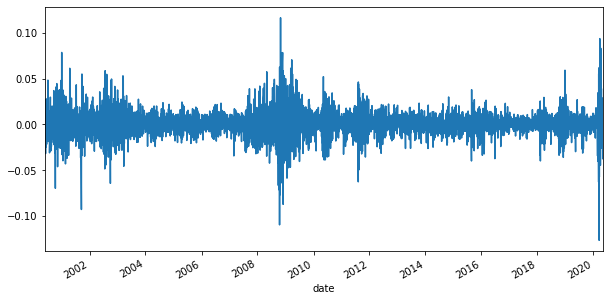

In [43]:
#plot daily returns of XLY

returns_df['XLY return'].plot(figsize=(10,5))

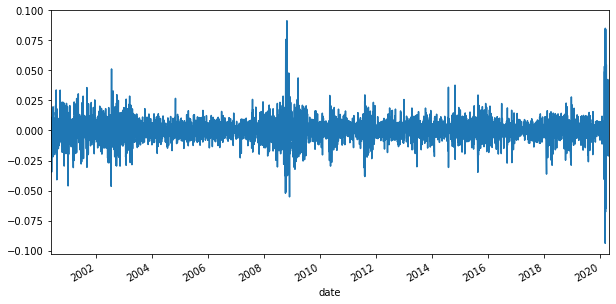

In [45]:
#plot daily returns of XLP

returns_df['XLP return'].plot(figsize=(10,5))

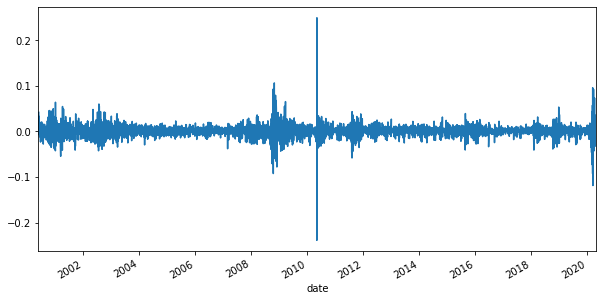

In [46]:
#plot daily returns of IVW

returns_df['IVW return'].plot(figsize=(10,5))

In [50]:
# Calculate the cumulative returns using the 'cumprod()' function
cumulative_returns_xly = (1 + returns_df['XLY return']).cumprod()
cumulative_returns_xlp = (1 + returns_df['XLP return']).cumprod()
cumulative_returns_ivw = (1 + returns_df['IVW return']).cumprod()
cumulative_returns_spy = (1 + returns_df['SP500 return']).cumprod()

cumulative_returns_xly.head()

date
2000-05-26         NaN
2000-05-30    1.007608
2000-05-31    1.031579
2000-06-01    1.039192
2000-06-02    1.067728
Name: XLY return, dtype: float64

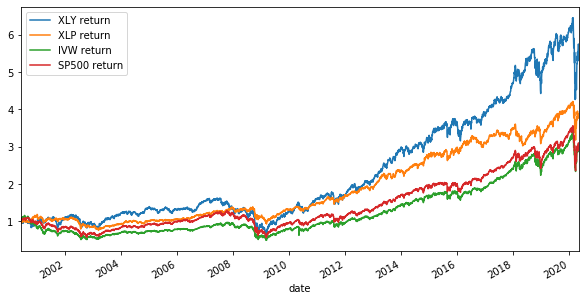

In [51]:
#plot cumulative returns

cumulative_returns_xly.plot(figsize=(10,5), legend=True)
cumulative_returns_xlp.plot(figsize=(10,5), legend=True)
cumulative_returns_ivw.plot(figsize=(10,5), legend=True)
cumulative_returns_spy.plot(figsize=(10,5), legend=True)

In [56]:
#need to check on dividend

In [54]:
# Calculate Sharpe Ratios for the sectors

XLY_sharpe_ratio = (returns_df['XLY return'].mean() * 252) / (returns_df['XLY return'].std() * np.sqrt(252))

XLP_sharpe_ratio = (returns_df['XLP return'].mean() * 252) / (returns_df['XLP return'].std() * np.sqrt(252))

IVW_sharpe_ratio = (returns_df['IVW return'].mean() * 252) / (returns_df['IVW return'].std() * np.sqrt(252))

SPY_sharpe_ratio = (returns_df['SP500 return'].mean() * 252) / (returns_df['SP500 return'].std() * np.sqrt(252))

print(f" XLY: {XLY_sharpe_ratio}, XLP: {XLP_sharpe_ratio}, IVW:{IVW_sharpe_ratio}, SPY:{SPY_sharpe_ratio}")




 XLY: 0.4955995473665896, XLP: 0.516631849698764, IVW:0.36610999593867377, SPY:0.37802120016801444


In [55]:
returns_df.head()

,XLY return,XLP return,IVW return,SP500 return
date,,,,
2000-05-26,NaN,NaN,NaN,NaN
2000-05-30,0.007608,-0.005759,0.041496,0.032609
2000-05-31,0.023790,-0.009521,0.000000,0.002193
2000-06-01,0.007380,0.002509,0.012451,0.017506
2000-06-02,0.027460,-0.034585,0.032912,0.017418


In [56]:
#START MONTE CARLO ANALYSIS (XLY)
#Set number of simulations
num_simulations = 1000

# Set number of trading days and get last closing price of XLY from DataFrame

num_trading_days = 30
xly_last_price = returns_df['XLY return'][-1]

# Initialize empty DataFrame to hold simulated prices for each simulation
simulated_prices_XLY_df = pd.DataFrame()


In [57]:
## Run the simulation `1000` times for XLY
for n in range(num_simulations):
    
    # Initialize the simulated prices list with the last closing price of XLY
    simulated_XLY_prices = [xly_last_price]
    simulated_XLY_prices

    # Simulate the returns for 504 days
    for i in range(num_trading_days):

    # Calculate the simulated price using the last price within the list
        simulated_price = simulated_XLY_prices[-1] * (1 + np.random.normal(avg_xly_daily_returns, std_xly_daily_returns))
        # Append the simulated price to the list
        simulated_XLY_prices.append(simulated_price)

    # Append simulated price of each simulation to DataFrame
    simulated_prices_XLY_df[f"Simulation {n+1}"] = pd.Series(simulated_XLY_prices)

simulated_prices_XLY_df.head()




,Simulation 1,Simulation 2,Simulation 3,Simulation 4,Simulation 5,Simulation 6,Simulation 7,Simulation 8,Simulation 9,Simulation 10,...,Simulation 991,Simulation 992,Simulation 993,Simulation 994,Simulation 995,Simulation 996,Simulation 997,Simulation 998,Simulation 999,Simulation 1000
0,-0.037393,-0.037393,-0.037393,-0.037393,-0.037393,-0.037393,-0.037393,-0.037393,-0.037393,-0.037393,...,-0.037393,-0.037393,-0.037393,-0.037393,-0.037393,-0.037393,-0.037393,-0.037393,-0.037393,-0.037393
1,-0.037423,-0.037682,-0.036175,-0.037603,-0.037531,-0.037535,-0.037163,-0.037332,-0.037868,-0.038501,...,-0.037159,-0.038431,-0.037184,-0.037126,-0.037997,-0.037682,-0.037267,-0.037465,-0.036652,-0.037481
2,-0.038491,-0.038404,-0.035147,-0.038844,-0.037830,-0.038457,-0.037554,-0.037833,-0.037030,-0.038465,...,-0.037054,-0.038835,-0.037229,-0.036605,-0.038623,-0.037655,-0.037563,-0.037487,-0.036655,-0.037176
3,-0.038227,-0.039092,-0.035381,-0.038252,-0.037154,-0.037549,-0.037662,-0.038053,-0.037301,-0.038948,...,-0.037625,-0.040018,-0.036952,-0.036411,-0.038990,-0.038789,-0.037425,-0.038020,-0.036026,-0.037029
4,-0.038232,-0.039643,-0.035560,-0.037308,-0.037203,-0.037378,-0.038350,-0.038930,-0.037465,-0.039871,...,-0.037251,-0.040010,-0.037084,-0.035972,-0.038900,-0.038462,-0.036929,-0.038103,-0.036589,-0.037643


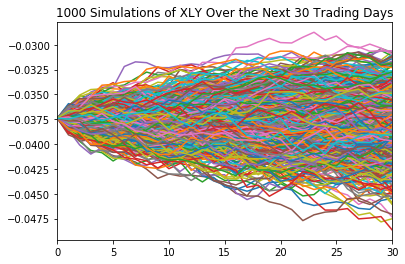

In [58]:
#plot 1000 simulations of 30 trading days
plot_title = f"{n+1} Simulations of XLY Over the Next 30 Trading Days"
simulated_prices_XLY_df.plot(legend=None, title=plot_title)

In [34]:
# Select the last row (price of each simulation on the 30th trading day)
simulated_ending_prices_XLY = simulated_prices_XLY_df.iloc[-1, :]
simulated_ending_prices_XLY.head()

Simulation 1   -6.280038e+49
Simulation 2    1.924368e+49
Simulation 3    1.204176e+53
Simulation 4    2.458026e+48
Simulation 5   -3.812681e+47
Name: 30, dtype: float64

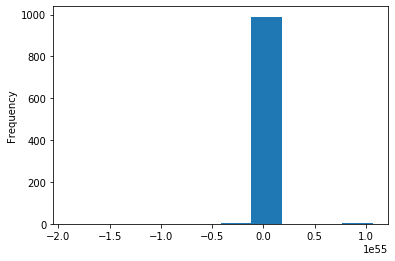

In [35]:
# Plot a frequency distribution of simulated ending prices
simulated_ending_prices_XLY.plot(kind='hist')

In [36]:
# Use `quantile` function to calculate the 95% confidence interval for simulated ending prices
confidence_interval = simulated_ending_prices_XLY.quantile(q=[0.025, 0.975])
confidence_interval

0.025   -5.930527e+52
0.975    1.198689e+53
Name: 30, dtype: float64

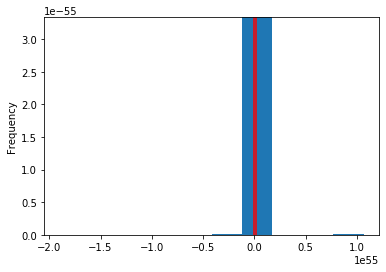

In [37]:
# Create a probability distribution histogram of simulated ending prices
# Mark the 95% confidence interval
plt.figure();
simulated_ending_prices_XLY.plot(kind='hist', density=True, bins=10)
plt.axvline(confidence_interval.iloc[0], color='r')
plt.axvline(confidence_interval.iloc[1], color='r')

In [38]:
# Set initial investment
initial_investment = 10000

# Calculate cumulative profit/loss of lower and upper bound
cumulative_pnl_lower_bound = initial_investment * ((confidence_interval.iloc[0] - xly_last_price) / xly_last_price)
cumulative_pnl_upper_bound = initial_investment * ((confidence_interval.iloc[1] - xly_last_price) / xly_last_price)

# Add the initial investment to the cumulative profit/loss of lower and upper bound
ending_investment_lower_bound = initial_investment + cumulative_pnl_lower_bound
ending_investment_upper_bound = initial_investment + cumulative_pnl_upper_bound

# Print the results
print(f"There is a 95% chance that an initial investment of $10,000 in XLB"
      f" over the next 30 trading days will end within in the range of"
      f" ${round(ending_investment_lower_bound,2)} and ${round(ending_investment_upper_bound,2)}")

There is a 95% chance that an initial investment of $10,000 in XLB over the next 30 trading days will end within in the range of $-5.283790632936746e+54 and $1.0679693046503597e+55


In [39]:
#START MONTE CARLO ANALYSIS XLP

# Calculate the mean of daily returns for XLP
avg_daily_return_xlp = concat_df.mean()['XLP_return']
print(f"The average daily return of XLP is {avg_daily_return_xlp}")

KeyError: 'XLP_return'

In [ ]:
#Set number of simulations
num_simulations = 1000

# Set number of trading days and get last closing price of XLP from DataFrame

num_trading_days = 30
xlp_last_price = concat_df['XLP close'][-1]

# Initialize empty DataFrame to hold simulated prices for each simulation
simulated_prices_XLP_df = pd.DataFrame()

In [ ]:
# Run the simulation `1000` times
for n in range(num_simulations):
    
    # Initialize the simulated prices list with the last closing price of XLP
    simulated_XLP_prices = [xlp_last_price]
    simulated_XLP_prices

    # Simulate the returns for 30 days
    for i in range(num_trading_days):

    # Calculate the simulated price using the last price within the list
        simulated_price = simulated_XLP_prices[-1] * (1 + np.random.normal(avg_daily_return_xlp, std_xlp_daily_returns))
        # Append the simulated price to the list
        simulated_XLP_prices.append(simulated_price)

    # Append simulated price of each simulation to DataFrame
    simulated_prices_XLP_df[f"Simulation {n+1}"] = pd.Series(simulated_XLP_prices)

simulated_prices_XLP_df.head()

In [ ]:
#Plot 1000 simulations of 30 trading days
plot_title = f"{n+1} Simulations of XLP Over the Next 30 Trading Days"
simulated_prices_XLP_df.plot(legend=None, title=plot_title)

In [ ]:
# Select the last row (price of each simulation on the 30th trading day)
simulated_ending_prices_XLP = simulated_prices_XLP_df.iloc[-1, :]
simulated_ending_prices_XLP.head()